# Data science challenge
Uitgevoerd door:
- Xin Wang
- Jens de Laat

## Opdracht:
House price predictor - Advanced

In [298]:
import pandas as pd  
import matplotlib as plt 
import seaborn as sns 
import numpy as np 
import sklearn as sk 
import os

from python_lib import setup_data, after_filtering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from pandas import DataFrame


In [299]:
# Standaard leeg
train_path = ""
test_path = ""

xins_path = "data/train.csv"
xins_test_path = "data/test.csv"

jens_train_path = "C:/Users/jensd/Desktop/Challange week/HousePricePredictor/data/train.csv"
jens_test_path = "C:/Users/jensd/Desktop/Challange week/HousePricePredictor/data/test.csv"

# Haalt omgevingswaarden op.
is_xins_device = os.environ.get("XIN")

if is_xins_device:
    train_path = xins_path
    test_path = xins_test_path
else:
    train_path = jens_train_path
    test_path = jens_test_path

In [300]:
# Haalt data op
train_data, test_data = setup_data(training_path=train_path, test_path=test_path)

In [301]:
train_data.drop

<bound method DataFrame.drop of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [302]:
# Kolommen
columns = train_data.columns.sort_values()

In [303]:
# Target variabel
target = ['SalePrice']
# Nutteloze kolommen
# Criteria 1200 of meer records van een kolomwaarde van 1 type. 
# Bijvoorbeeld: Kolom A met 1000 records waarin waarden 10, 20, 30 voorkomen, waarbij 900 de waarde 10 heeft.
# ['3SsnPorch', 'Alley', 'BldgType', 'BsmtCond',  'BsmtFinSF2', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
# 'ExterCond','Functional', 'GarageCond', 'Heating', 'Id', "KitchenAbvGr", 'LandContour', 'LandSlope', 'LowQualFinSF',  'PavedDrive',
# 'PoolArea','MiscFeature', 'MiscVal', "RoofMatl", "SaleCondition", "SaleType", "ScreenPorch", "Street", "TotalBsmtSF", "Utilities"]
useless_columns = ['3SsnPorch', 'Alley', 'BldgType', 'BsmtCond',  'BsmtFinSF2', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
 'ExterCond','Functional', 'GarageCond', 'Heating', 'Id', "KitchenAbvGr", 'LandContour', 'LandSlope', 'LowQualFinSF',  'PavedDrive',
 'PoolArea','MiscFeature', 'MiscVal', "RoofMatl", "SaleCondition", "SaleType", "ScreenPorch", "Street", "TotalBsmtSF", "Utilities"]

# Numerieke kolommen
numeric_columns = ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr','BsmtFinSF1','BsmtFullBath', 'BsmtHalfBath','BsmtUnfSF','Fireplaces', 
       'FullBath', 'GarageArea', 'GarageCars', 'GrLivArea', 'HalfBath', 'LotArea', 'LotFrontage', 'MSSubClass', 
       'MasVnrArea', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold']

# Categorische kolommen
categorical_columns = [col for col in columns if (col not in numeric_columns) and col not in useless_columns and col not in target]

#### Voorbeeld van nutteloze kolom

In [304]:
street_column = train_data[["Street", "Alley"]]

<Axes: xlabel='Street'>

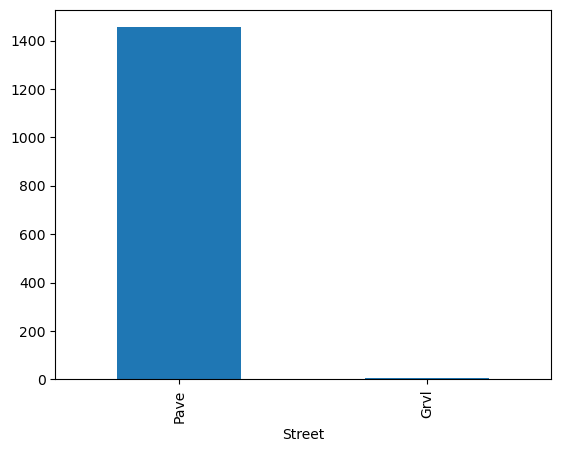

In [305]:
street_column["Street"].value_counts().plot.bar()

Bijna alle records hebben pave als waarde. Het aantal Grvl waarden zijn zo klein dat ze nauwelijks effect hebben tot de SalePrice.

C:\Users\Xin20\AppData\Local\Temp\ipykernel_28256\3526503307.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  street_column["Alley"].fillna("NA", inplace=True)
C:\Users\Xin20\AppData\Local\Temp\ipykernel_28256\3526503307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_column["Alley"].fillna("NA", inplace=True)


<Axes: xlabel='Alley'>

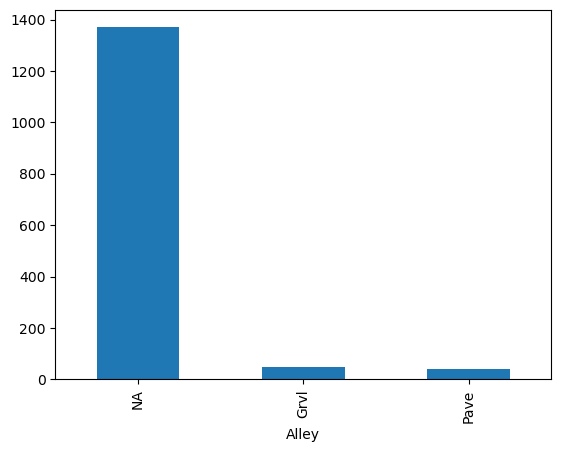

In [306]:
street_column["Alley"].fillna("NA", inplace=True)
street_column["Alley"].value_counts().plot.bar()

Hetzelfde geldt ook voor de Alley dataset. Om die reden, is er besloten om kolommen te verwijderen waarvan minstens 1200 records dezelde waarde hebben.

In [307]:
print(len(numeric_columns))
print(len(categorical_columns))

26
22


In [308]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [309]:
# Training data after all the useless columns are gone
training_data_useful = after_filtering(df=train_data, useless_columns=useless_columns, target=[])
training_data_useful

[]


""
0
1
2
3
4
...
1455
1456
1457
1458


Van de 48 kolommen, bevatten 13 kolommen missende waarden
- LotFrontage, 
- MasVnrType, 
- MasVnrArea, 
- BsmtExposure, 
- BsmtFinType1, 
- FireplaceQu, 
- GarageType, 
- GarageYrBlt,  
- GarageFinish, 
- GarageQual, 
- GarageCond, 
- PoolQC, 
- Fence, 

In [310]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [311]:
train_data.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

## Data understanding 

Nadat alle onnodige kolommen weggelaten zijn voor deze opdracht, zal er in de 48 kolommen gedoken worden.

#### Aanpak
Eerst zullen de 26 numerieke variabelen geanalyseerd worden. Hierbij zal de pearson correlatie metriek toegepast worden.


### Numeriek VS Numeriek

In [312]:
locallist = numeric_columns + target + ["totalFlrSF"]
train_data["totalFlrSF"] = train_data["1stFlrSF"] + train_data["2ndFlrSF"] + train_data["TotalBsmtSF"] + train_data["GarageArea"]
locallist

['1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'LotArea',
 'LotFrontage',
 'MSSubClass',
 'MasVnrArea',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'TotRmsAbvGrd',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold',
 'SalePrice',
 'totalFlrSF']

In [313]:
numeric_correlation = train_data[locallist].corr()
numeric_correlation.style.background_gradient(cmap="coolwarm")

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,LotArea,LotFrontage,MSSubClass,MasVnrArea,MoSold,OpenPorchSF,OverallCond,OverallQual,TotRmsAbvGrd,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice,totalFlrSF
1stFlrSF,1.000000,-0.202646,0.127401,0.445863,0.244671,0.001956,0.317987,0.410531,0.380637,0.489782,0.439317,0.566024,-0.119916,0.299475,0.457181,-0.251758,0.344501,0.031372,0.211671,-0.144203,0.476224,0.409516,0.235459,0.281986,0.240379,-0.013604,0.605852,0.795260
2ndFlrSF,-0.202646,1.000000,0.502901,-0.137079,-0.169494,-0.023855,0.004469,0.194561,0.421378,0.138347,0.183926,0.687501,0.609707,0.050986,0.080177,0.307886,0.174561,0.035164,0.208026,0.028942,0.295493,0.616423,0.092165,0.010308,0.140024,-0.028700,0.319334,0.324631
BedroomAbvGr,0.127401,0.502901,1.000000,-0.107355,-0.150673,0.046519,0.166643,0.107570,0.363252,0.065253,0.086106,0.521270,0.226651,0.119690,0.263170,-0.023438,0.102821,0.046544,0.093810,0.012980,0.101676,0.676620,0.046854,-0.070651,-0.040581,-0.036014,0.168213,0.318015
BsmtFinSF1,0.445863,-0.137079,-0.107355,1.000000,0.649212,0.067418,-0.495251,0.260011,0.058543,0.296970,0.224054,0.208171,0.004262,0.214103,0.233633,-0.069836,0.264736,-0.015727,0.111761,-0.046231,0.239666,0.044316,0.204306,0.249503,0.128451,0.014359,0.386420,0.422675
BsmtFullBath,0.244671,-0.169494,-0.150673,0.649212,1.000000,-0.147871,-0.422900,0.137928,-0.064512,0.179189,0.131881,0.034836,-0.030905,0.158155,0.100949,0.003491,0.085310,-0.025361,0.067341,-0.054942,0.111098,-0.053275,0.175315,0.187599,0.119470,0.067049,0.227122,0.202102
BsmtHalfBath,0.001956,-0.023855,0.046519,0.067418,-0.147871,1.000000,-0.095804,0.028976,-0.054536,-0.024536,-0.020891,-0.018918,-0.012340,0.048046,-0.007234,-0.002333,0.026673,0.032873,-0.025324,0.117821,-0.040150,-0.023836,0.040161,-0.038162,-0.012337,-0.046524,-0.016844,-0.015690
BsmtUnfSF,0.317987,0.004469,0.166643,-0.495251,-0.422900,-0.095804,1.000000,0.051575,0.288886,0.183303,0.214175,0.240257,-0.041118,-0.002618,0.132644,-0.140759,0.114442,0.034888,0.129005,-0.136841,0.308159,0.250647,-0.005316,0.149040,0.181133,-0.041258,0.214479,0.361229
Fireplaces,0.410531,0.194561,0.107570,0.260011,0.137928,0.028976,0.051575,1.000000,0.243671,0.269141,0.300789,0.461679,0.203649,0.271364,0.266639,-0.045569,0.249070,0.046357,0.169405,-0.023820,0.396765,0.326114,0.200019,0.147716,0.112581,-0.024096,0.466929,0.469545
FullBath,0.380637,0.421378,0.363252,0.058543,-0.064512,-0.054536,0.288886,0.243671,1.000000,0.405656,0.469672,0.630012,0.136381,0.126031,0.198769,0.131608,0.276833,0.055872,0.259977,-0.194149,0.550600,0.554784,0.187703,0.468271,0.439046,-0.019669,0.560664,0.583990
GarageArea,0.489782,0.138347,0.065253,0.296970,0.179189,-0.024536,0.183303,0.269141,0.405656,1.000000,0.882475,0.468997,0.163549,0.180403,0.344997,-0.098672,0.373066,0.027974,0.241435,-0.151521,0.562022,0.337822,0.224666,0.478954,0.371600,-0.027378,0.623431,0.706246


10 Kolommen hebben enige verband met de SalesPrice variabel. Dus 0.5 > Correlatie of Correlatie < -0.5
- GrLivArea
- OverallQual
- YearBuilt
- YearRemodAdd
- TotRmsAbvGrd
- FullBath
- GarageArea
- GarageCars
- 1stFlrSF
- TotalFlrSF

In [314]:
correlated_numeric_columns = ["GrLivArea",  "OverallQual", "YearBuilt",  "YearRemodAdd", "TotRmsAbvGrd", "FullBath", "GarageArea", "GarageCars", "1stFlrSF", "totalFlrSF"] + target

In [315]:
numeric_correlation = train_data[correlated_numeric_columns]

numeric_correlation.corr().style.background_gradient(cmap="coolwarm")

,GrLivArea,OverallQual,YearBuilt,YearRemodAdd,TotRmsAbvGrd,FullBath,GarageArea,GarageCars,1stFlrSF,totalFlrSF,SalePrice
GrLivArea,1.000000,0.593007,0.199010,0.287389,0.825489,0.630012,0.468997,0.467247,0.566024,0.854073,0.708624
OverallQual,0.593007,1.000000,0.572323,0.550684,0.427452,0.550600,0.562022,0.600671,0.476224,0.698060,0.790982
YearBuilt,0.199010,0.572323,1.000000,0.592855,0.095589,0.468271,0.478954,0.537850,0.281986,0.404367,0.522897
YearRemodAdd,0.287389,0.550684,0.592855,1.000000,0.191740,0.439046,0.371600,0.420622,0.240379,0.376773,0.507101
TotRmsAbvGrd,0.825489,0.427452,0.095589,0.191740,1.000000,0.554784,0.337822,0.362289,0.409516,0.651864,0.533723
FullBath,0.630012,0.550600,0.468271,0.439046,0.554784,1.000000,0.405656,0.469672,0.380637,0.583990,0.560664
GarageArea,0.468997,0.562022,0.478954,0.371600,0.337822,0.405656,1.000000,0.882475,0.489782,0.706246,0.623431
GarageCars,0.467247,0.600671,0.537850,0.420622,0.362289,0.469672,0.882475,1.000000,0.439317,0.656605,0.640409
1stFlrSF,0.566024,0.476224,0.281986,0.240379,0.409516,0.380637,0.489782,0.439317,1.000000,0.795260,0.605852
totalFlrSF,0.854073,0.698060,0.404367,0.376773,0.651864,0.583990,0.706246,0.656605,0.795260,1.000000,0.809561


#### Data visualisatie

<Axes: xlabel='totalFlrSF', ylabel='SalePrice'>

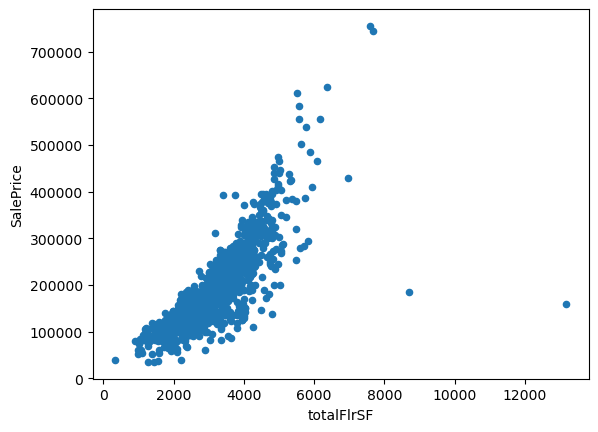

In [316]:
import matplotlib.pyplot as plt 
relevant_data = train_data[correlated_numeric_columns]

relevant_data.plot.scatter("totalFlrSF", "SalePrice")

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

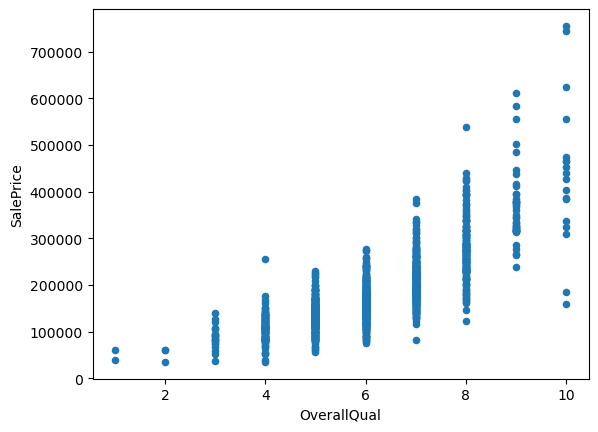

In [317]:
relevant_data.plot.scatter("OverallQual", "SalePrice")

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

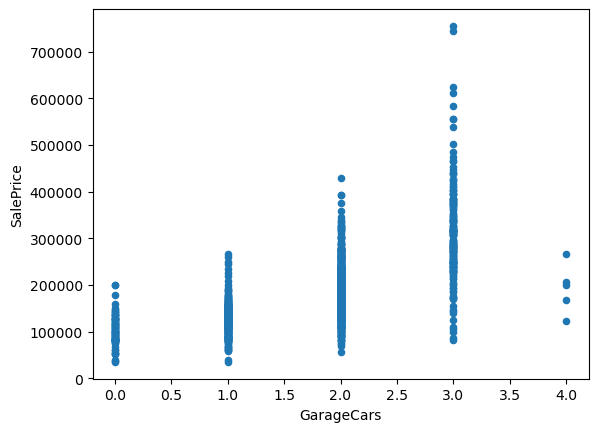

In [318]:
relevant_data.plot.scatter("GarageCars", "SalePrice")

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

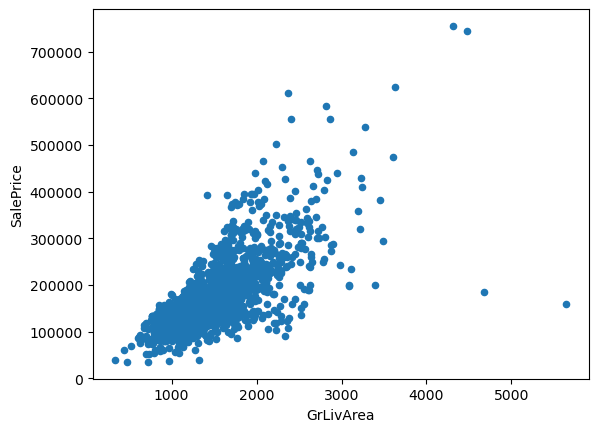

In [319]:
relevant_data.plot.scatter("GrLivArea", "SalePrice")

### Categorische waarden

In [320]:
pl_l = categorical_columns + target
categorical_data = train_data[pl_l]

categorical_data['BsmtExposure'] = categorical_data['BsmtExposure'].fillna("NA")
categorical_data['BsmtFinType1'] = categorical_data['BsmtFinType1'].fillna("NA")
categorical_data['Fence'] = categorical_data['Fence'].fillna("NA")
categorical_data['FireplaceQu'] = categorical_data['FireplaceQu'].fillna("NA")
categorical_data["GarageFinish"] = categorical_data["GarageFinish"].fillna("NA")
categorical_data["KitchenQual"] = categorical_data["KitchenQual"].fillna("NA")
categorical_data["PoolQC"] = categorical_data["PoolQC"].fillna("NA")

C:\Users\Xin20\AppData\Local\Temp\ipykernel_28256\1973794437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['BsmtExposure'] = categorical_data['BsmtExposure'].fillna("NA")
C:\Users\Xin20\AppData\Local\Temp\ipykernel_28256\1973794437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['BsmtFinType1'] = categorical_data['BsmtFinType1'].fillna("NA")
C:\Users\Xin20\AppData\Local\Temp\ipykernel_28256\1973794437.py:6: SettingWithCopyWarning: 
A value is trying to be set on a

In [321]:
## Ordinal scaling
mappingBsmtExp = ["NA", "No", "Mn", "Av", "Gd"]
mapBsmtFinT1 = ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
mappingExtQual = ["Po","Fa", "TA", "Gd","Ex" ]
mapFence = ["NA", "MnWw", "GdWo", "MnPrv", "GdPrv"]
mapFireQu = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
mapGarageFin = ["NA", "Unf", "RFn", "Fin"]
mapBsmntQu = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]

mapHeatQC = ["Po", "Fa", "TA", "Gd", "Ex"]
mapKitchQual = ["Po", "Fa", "TA", "Gd", "Ex"]
mapLotShape = ["IR3", "IR2", "IR1", "Reg"]
mapPoolQc = ["NA", "Fa", "TA", "Gd", "Ex"]

# Moet one-hot encoding zijn
mapFoundation = ["Wood", "Stone", "Slab", "PConc", "CBlock", "BrkTil"]

def get_ordinal(dataframe: DataFrame, column: str, maps):
    # Impute missing values with a specific category (e.g., "NA")
    encoder = OrdinalEncoder(categories=[maps])
    dataframe[column] = encoder.fit_transform(dataframe[[column]])
    return dataframe

categorical_data = get_ordinal(categorical_data, "BsmtExposure", mappingBsmtExp)
categorical_data = get_ordinal(categorical_data, "BsmtFinType1", mapBsmtFinT1)
categorical_data = get_ordinal(categorical_data, "ExterQual", mappingExtQual)
categorical_data = get_ordinal(categorical_data, "Fence", mapFence)

categorical_data = get_ordinal(categorical_data, "FireplaceQu", mapFireQu)
categorical_data = get_ordinal(categorical_data, "Foundation", mapFoundation)
categorical_data = get_ordinal(categorical_data, "GarageFinish", mapGarageFin)

categorical_data = get_ordinal(categorical_data, "HeatingQC", mapHeatQC)
categorical_data = get_ordinal(categorical_data, "KitchenQual", mapKitchQual)
categorical_data = get_ordinal(categorical_data, "LotShape", mapLotShape)
categorical_data = get_ordinal(categorical_data, "PoolQC", mapPoolQc)

C:\Users\Xin20\AppData\Local\Temp\ipykernel_28256\628325500.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = encoder.fit_transform(dataframe[[column]])
C:\Users\Xin20\AppData\Local\Temp\ipykernel_28256\628325500.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = encoder.fit_transform(dataframe[[column]])
C:\Users\Xin20\AppData\Local\Temp\ipykernel_28256\628325500.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [322]:
ddd = categorical_data[["BsmtExposure",	"BsmtFinType1",	"ExterQual", "Fence", "FireplaceQu", "Foundation", 	"GarageFinish", "HeatingQC", "KitchenQual", "LotShape", "PoolQC", "SalePrice"]]

ddd.corr().style.background_gradient(cmap="coolwarm")

,BsmtExposure,BsmtFinType1,ExterQual,Fence,FireplaceQu,Foundation,GarageFinish,HeatingQC,KitchenQual,LotShape,PoolQC,SalePrice
BsmtExposure,1.000000,0.347840,0.249101,-0.071167,0.166902,-0.134356,0.251367,0.150852,0.254707,-0.183540,0.053581,0.374696
BsmtFinType1,0.347840,1.000000,0.226197,-0.032641,0.106162,-0.139061,0.246040,0.155648,0.248978,-0.111492,0.040840,0.304908
ExterQual,0.249101,0.226197,1.000000,-0.233852,0.361798,-0.467191,0.519054,0.520027,0.716122,-0.188668,0.055435,0.682639
Fence,-0.071167,-0.032641,-0.233852,1.000000,-0.073133,0.162720,-0.137802,-0.180254,-0.131697,0.061751,0.134553,-0.146942
FireplaceQu,0.166902,0.106162,0.361798,-0.073133,1.000000,-0.136291,0.394891,0.207500,0.353806,-0.193112,0.054380,0.520438
Foundation,-0.134356,-0.139061,-0.467191,0.162720,-0.136291,1.000000,-0.401245,-0.367775,-0.387027,0.154208,-0.016111,-0.382479
GarageFinish,0.251367,0.246040,0.519054,-0.137802,0.394891,-0.401245,1.000000,0.392244,0.474570,-0.236527,0.031603,0.549247
HeatingQC,0.150852,0.155648,0.520027,-0.180254,0.207500,-0.367775,0.392244,1.000000,0.504228,-0.119556,-0.016659,0.427649
KitchenQual,0.254707,0.248978,0.716122,-0.131697,0.353806,-0.387027,0.474570,0.504228,1.000000,-0.157933,0.067195,0.659600
LotShape,-0.183540,-0.111492,-0.188668,0.061751,-0.193112,0.154208,-0.236527,-0.119556,-0.157933,1.000000,-0.053321,-0.267759


In [323]:
# One hot encoding analysis
mapFoundation = ["Wood", "Stone", "Slab", "PConc", "CBlock", "BrkTil"]

#### Visualisaties relatie

<Axes: xlabel='KitchenQual', ylabel='SalePrice'>

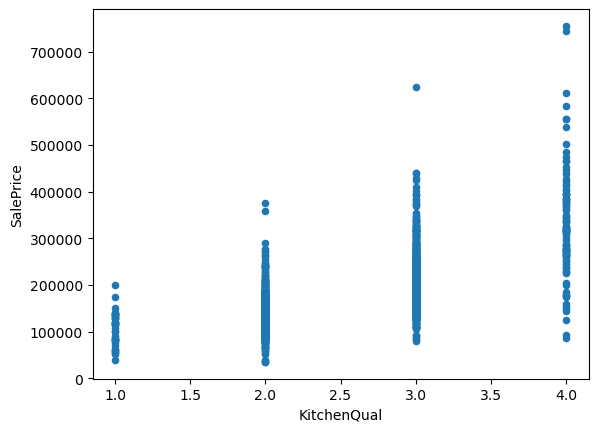

In [324]:
ddd.plot.scatter("KitchenQual", "SalePrice")

<Axes: xlabel='ExterQual', ylabel='SalePrice'>

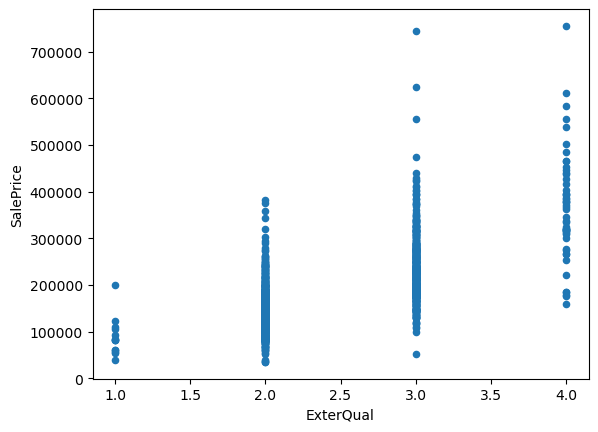

In [325]:
ddd.plot.scatter("ExterQual", "SalePrice")

In [326]:
def get_one_hot_encoding(data: DataFrame):
    return pd.get_dummies(data=data, dtype="float")

In [327]:
categorical_data.columns

Index(['BsmtExposure', 'BsmtFinType1', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'GarageFinish',
       'GarageQual', 'GarageType', 'GarageYrBlt', 'HeatingQC', 'HouseStyle',
       'KitchenQual', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType',
       'Neighborhood', 'PoolQC', 'RoofStyle', 'SalePrice'],
      dtype='object')

In [328]:
one_hot_data = categorical_data[["HouseStyle", "Foundation", "MSZoning", "LotConfig", "Neighborhood", "RoofStyle", "MasVnrType"]]

In [329]:
result = get_one_hot_encoding(one_hot_data)

result = result.join(train_data["SalePrice"])
result.corr().style.background_gradient(cmap="coolwarm")

,Foundation,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,SalePrice
Foundation,1.000000,0.234894,0.112431,-0.032412,0.066459,0.113658,-0.205064,0.034238,0.035766,0.034106,-0.180371,0.048696,-0.142899,0.246042,0.025419,-0.049163,-0.061048,-0.007507,0.030008,-0.090696,0.020339,0.057807,0.203963,0.028382,-0.217152,0.104479,0.070058,-0.208240,0.082517,0.024241,-0.034589,0.158219,0.043250,0.086820,-0.136295,-0.192923,0.265539,0.101729,0.083653,-0.089596,-0.209052,-0.088358,-0.071069,-0.006994,0.011666,0.012607,0.069785,-0.032452,0.010655,-0.005304,0.055952,-0.116465,-0.191957,-0.382479
HouseStyle_1.5Fin,0.234894,1.000000,-0.033788,-0.341514,-0.025489,-0.029919,-0.227371,-0.055372,-0.074124,0.079626,-0.074124,-0.014728,-0.149611,0.200242,0.018909,-0.053739,-0.024729,-0.017999,0.025023,-0.037272,-0.012718,-0.036146,0.215569,0.049532,-0.116198,0.043970,0.101096,-0.072274,0.171635,-0.037272,-0.014467,-0.053933,-0.027044,-0.068548,-0.031376,-0.081026,0.175908,0.160931,-0.028519,-0.059145,-0.085910,-0.045324,-0.028125,-0.029919,-0.032548,0.133004,0.047440,-0.141396,-0.023834,0.047569,0.009239,-0.169243,-0.106449,-0.163466
HouseStyle_1.5Unf,0.112431,-0.033788,1.000000,-0.097859,-0.007304,-0.008573,-0.065152,-0.015866,-0.021240,-0.008171,-0.021240,0.057151,-0.086668,0.096819,0.027032,-0.025812,-0.017946,-0.005157,-0.001373,-0.010680,-0.003644,-0.010358,0.195894,-0.013759,-0.033296,0.019559,-0.026682,-0.023534,0.073574,-0.010680,-0.018336,-0.003067,-0.007749,-0.022574,-0.016726,-0.023217,0.024104,-0.012987,-0.022736,0.015499,-0.024617,-0.012987,-0.016085,-0.008573,-0.009326,0.052027,-0.008573,-0.048566,-0.006830,-0.003644,-0.010025,-0.065152,-0.030502,-0.087686
HouseStyle_1Story,-0.032412,-0.341514,-0.097859,1.000000,-0.073821,-0.086653,-0.658517,-0.160368,-0.214679,-0.016154,-0.095125,-0.025739,0.196704,-0.159139,-0.020601,-0.015307,0.004880,0.000287,0.024063,0.109137,-0.036835,-0.104688,-0.062009,-0.029198,0.074044,-0.047454,0.017756,-0.171262,-0.047056,-0.082408,0.058069,0.178766,-0.008319,-0.008171,-0.119301,0.077904,-0.118884,-0.110151,0.101188,-0.009310,-0.033539,0.058800,0.035311,0.040082,0.022393,-0.180256,-0.086653,0.209800,-0.049198,0.000203,0.034521,-0.006788,0.108261,-0.061811
HouseStyle_2.5Fin,0.066459,-0.025489,-0.007304,-0.073821,1.000000,-0.006467,-0.049148,-0.011969,-0.016023,-0.006164,-0.016023,0.081308,-0.052399,0.047003,0.013494,-0.019472,-0.013538,-0.003891,0.004872,-0.008057,-0.002749,-0.007813,-0.015097,-0.010379,-0.025117,0.036412,-0.020128,-0.017753,-0.011969,-0.008057,-0.013832,-0.031683,-0.005846,-0.017029,-0.012617,-0.017514,0.082666,0.276283,-0.017151,-0.015232,-0.018570,-0.009797,-0.012134,-0.006467,-0.007036,0.016794,-0.006467,-0.013258,-0.005152,-0.002749,-0.007563,-0.049148,-0.023010,0.036526
HouseStyle_2.5Unf,0.113658,-0.029919,-0.008573,-0.086653,-0.006467,1.000000,-0.057691,-0.014049,-0.018808,0.088801,-0.018808,-0.009171,-0.129377,0.141293,0.020992,-0.022856,-0.015891,-0.004567,0.001306,-0.009457,-0.003227,-0.009171,0.022832,-0.012183,-0.029483,0.026564,-0.023626,-0.020839,0.036349,-0.009457,-0.016237,-0.037189,-0.

In [330]:
correlated_categorical_columns = ["KitchenQual", "ExterQual", "FireplaceQu", "GarageFinish"]

In [331]:
len(result.columns)

54

De relevante categorische kolommen die bruikbaar kunnen zijn voor modeltraining zijn
- KitchenQual
- ExterQual

## Data preperation

### Variabel selectie

In [332]:
correlated_columns = correlated_numeric_columns + correlated_categorical_columns
correlated_columns

['GrLivArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'FullBath',
 'GarageArea',
 'GarageCars',
 '1stFlrSF',
 'totalFlrSF',
 'SalePrice',
 'KitchenQual',
 'ExterQual',
 'FireplaceQu',
 'GarageFinish']

In [333]:
train_data_prep = train_data[correlated_columns]

In [334]:
train_data_prep.head()

,GrLivArea,OverallQual,YearBuilt,YearRemodAdd,TotRmsAbvGrd,FullBath,GarageArea,GarageCars,1stFlrSF,totalFlrSF,SalePrice,KitchenQual,ExterQual,FireplaceQu,GarageFinish
0,1710,7,2003,2003,8,2,548,2,856,3114,208500,Gd,Gd,NaN,RFn
1,1262,6,1976,1976,6,2,460,2,1262,2984,181500,TA,TA,TA,RFn
2,1786,7,2001,2002,6,2,608,2,920,3314,223500,Gd,Gd,TA,RFn
3,1717,7,1915,1970,7,1,642,3,961,3115,140000,Gd,TA,Gd,Unf
4,2198,8,2000,2000,9,2,836,3,1145,4179,250000,Gd,Gd,TA,RFn


In [335]:
train_data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GrLivArea     1460 non-null   int64 
 1   OverallQual   1460 non-null   int64 
 2   YearBuilt     1460 non-null   int64 
 3   YearRemodAdd  1460 non-null   int64 
 4   TotRmsAbvGrd  1460 non-null   int64 
 5   FullBath      1460 non-null   int64 
 6   GarageArea    1460 non-null   int64 
 7   GarageCars    1460 non-null   int64 
 8   1stFlrSF      1460 non-null   int64 
 9   totalFlrSF    1460 non-null   int64 
 10  SalePrice     1460 non-null   int64 
 11  KitchenQual   1460 non-null   object
 12  ExterQual     1460 non-null   object
 13  FireplaceQu   770 non-null    object
 14  GarageFinish  1379 non-null   object
dtypes: int64(11), object(4)
memory usage: 171.2+ KB


Op basis van de gekozen variabelen, zullen twee kolommen opgeschoont moeten worden.

In [336]:
train_data_prep["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [337]:
train_data_prep["GarageFinish"].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

### Feature engineering

- TotalSf

### Data cleaning

In [338]:
from python_lib import impute_empty_category_data, remove_outliers

cleaned_data = impute_empty_category_data(train_data_prep)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GrLivArea     1460 non-null   int64 
 1   OverallQual   1460 non-null   int64 
 2   YearBuilt     1460 non-null   int64 
 3   YearRemodAdd  1460 non-null   int64 
 4   TotRmsAbvGrd  1460 non-null   int64 
 5   FullBath      1460 non-null   int64 
 6   GarageArea    1460 non-null   int64 
 7   GarageCars    1460 non-null   int64 
 8   1stFlrSF      1460 non-null   int64 
 9   totalFlrSF    1460 non-null   int64 
 10  SalePrice     1460 non-null   int64 
 11  KitchenQual   1460 non-null   object
 12  ExterQual     1460 non-null   object
 13  FireplaceQu   1460 non-null   object
 14  GarageFinish  1460 non-null   object
dtypes: int64(11), object(4)
memory usage: 171.2+ KB


c:\Users\Xin20\Desktop\ChallengeWeekXinJens\HousePricePredictor\python_lib\data_preperation.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FireplaceQu"] = df["FireplaceQu"].fillna("NA")
c:\Users\Xin20\Desktop\ChallengeWeekXinJens\HousePricePredictor\python_lib\data_preperation.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GarageFinish"] = df["GarageFinish"].fillna("NA")


<Axes: ylabel='GrLivArea'>

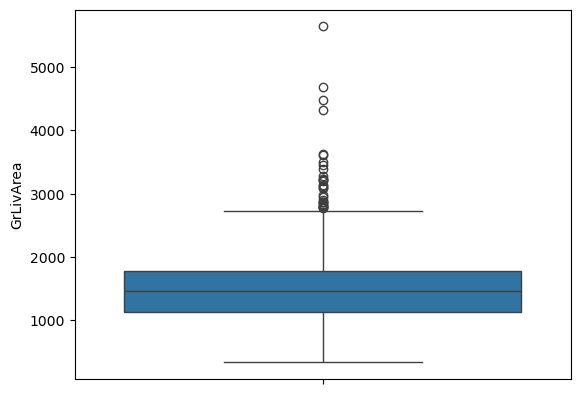

In [339]:
sns.boxplot(train_data_prep["GrLivArea"])

<Axes: ylabel='GarageCars'>

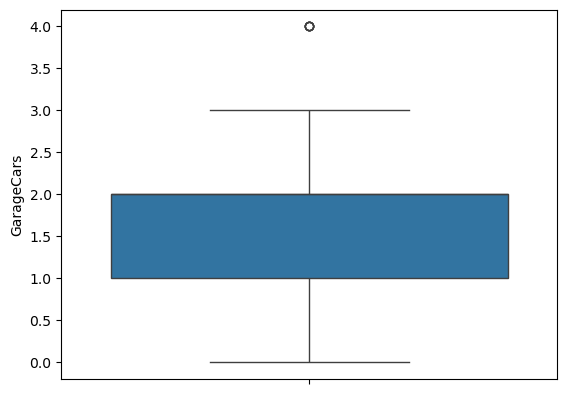

In [340]:
sns.boxplot(train_data_prep["GarageCars"])

<Axes: ylabel='GrLivArea'>

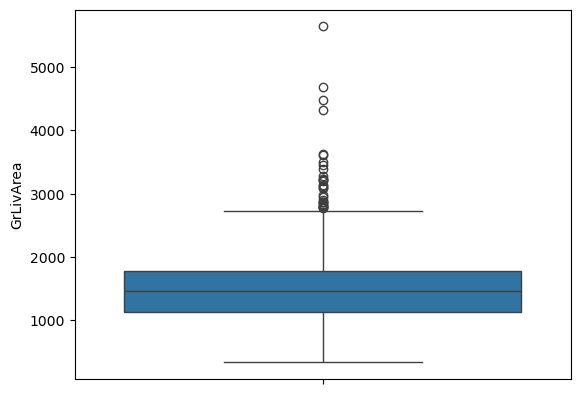

In [341]:
sns.boxplot(train_data_prep["GrLivArea"])

<Axes: ylabel='OverallQual'>

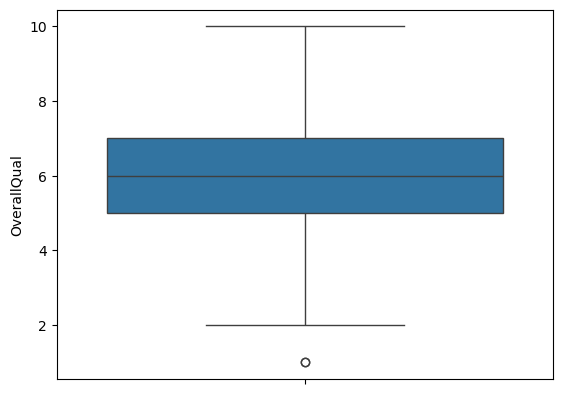

In [342]:
qual_data = train_data_prep["OverallQual"]
sns.boxplot(qual_data)

<Axes: ylabel='TotRmsAbvGrd'>

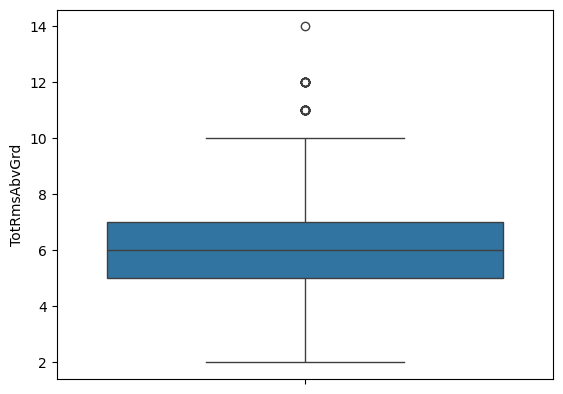

In [343]:
totRmsAbvGrd = train_data_prep["TotRmsAbvGrd"]
sns.boxplot(totRmsAbvGrd)

In [344]:
# cleaned_data = remove_outliers(train_data_prep)
# Zal later vervangen moeten worden met een methode uit de data preperation python bestand.
from python_lib import encode_categorical_data, one_hot_encode_data
from pandas import Series

def z_index_values(df: DataFrame, column: str, treshold: float = 2.0, is_below=True) -> Series:
    """
    Filters a DataFrame based on z-scores.

    Args:
        df: The input DataFrame.
        column: The column to filter on.
        threshold: The z-score threshold.
        is_below: If True, filters values below the threshold; otherwise, filters values above the threshold.

    Returns:
        A boolean Series indicating whether each row in the specified column satisfies the filtering condition.
    """
    z_scores = (df[column] - df[column].mean()) / df[column].std()

    if is_below: 
        return z_scores < treshold
    return z_scores > treshold

def remove_outliers(df):
    # Outliers verwijderen, mits het aantal niet te groot is.
    return df[
        (z_index_values(df, "GrLivArea", 3.0)) &
        (z_index_values(df, "OverallQual", -3.0, is_below=False)) &
        (z_index_values(df, "TotRmsAbvGrd", 2.5)) &
        (z_index_values(df, "GarageCars", 2.5))
    ]

# Remove outliers
cleaned_data = remove_outliers(train_data_prep)
# Ordinal encoding toegepast op categorische data met ordening
cleaned_data = encode_categorical_data(cleaned_data)
# One hot encoding toegepast op niet geordende data.
cleaned_data = one_hot_encode_data(cleaned_data)

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1416 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1416 non-null   int64  
 1   OverallQual   1416 non-null   int64  
 2   YearBuilt     1416 non-null   int64  
 3   YearRemodAdd  1416 non-null   int64  
 4   TotRmsAbvGrd  1416 non-null   int64  
 5   FullBath      1416 non-null   int64  
 6   GarageArea    1416 non-null   int64  
 7   GarageCars    1416 non-null   int64  
 8   1stFlrSF      1416 non-null   int64  
 9   totalFlrSF    1416 non-null   int64  
 10  SalePrice     1416 non-null   int64  
 11  KitchenQual   1416 non-null   float64
 12  ExterQual     1416 non-null   float64
 13  FireplaceQu   1416 non-null   float64
 14  GarageFinish  1416 non-null   float64
dtypes: float64(4), int64(11)
memory usage: 177.0 KB


c:\Users\Xin20\Desktop\ChallengeWeekXinJens\HousePricePredictor\python_lib\data_preperation.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = encoder.fit_transform(dataframe[[column]])
c:\Users\Xin20\Desktop\ChallengeWeekXinJens\HousePricePredictor\python_lib\data_preperation.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = encoder.fit_transform(dataframe[[column]])
c:\Users\Xin20\Desktop\ChallengeWeekXinJens\HousePricePredictor\python_lib\data_preperation.py:4

In [345]:
type(train_data_prep['GrLivArea'] < 4000)

pandas.core.series.Series

<Axes: ylabel='GrLivArea'>

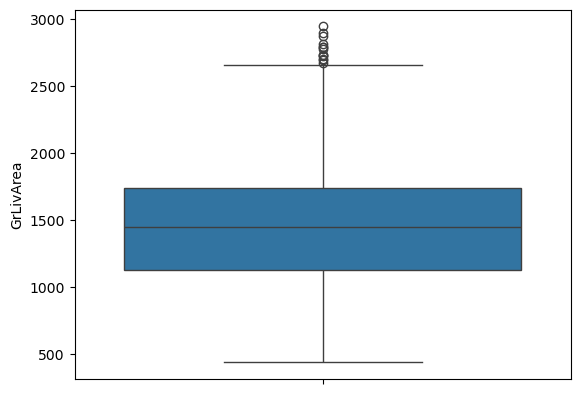

In [346]:
sns.boxplot(cleaned_data["GrLivArea"])

<Axes: ylabel='OverallQual'>

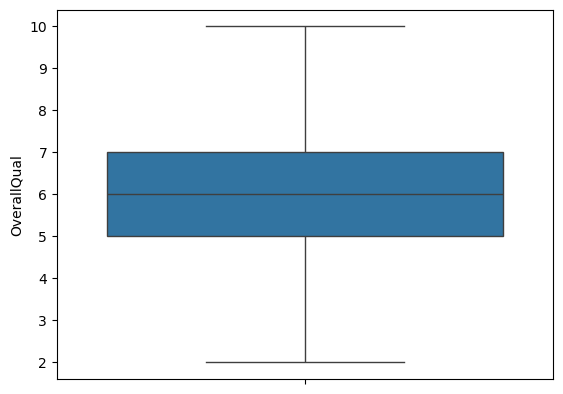

In [347]:
sns.boxplot(cleaned_data["OverallQual"])


<Axes: ylabel='TotRmsAbvGrd'>

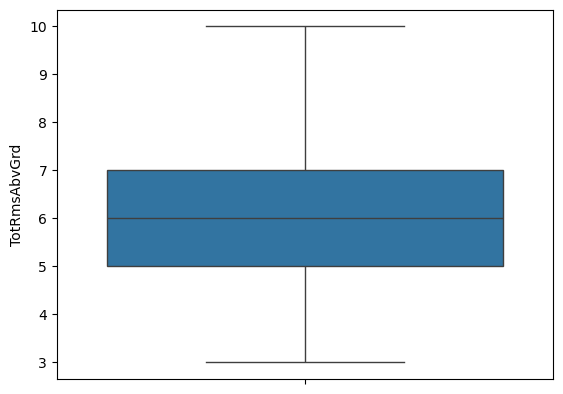

In [348]:
sns.boxplot(cleaned_data["TotRmsAbvGrd"])

<Axes: ylabel='GarageCars'>

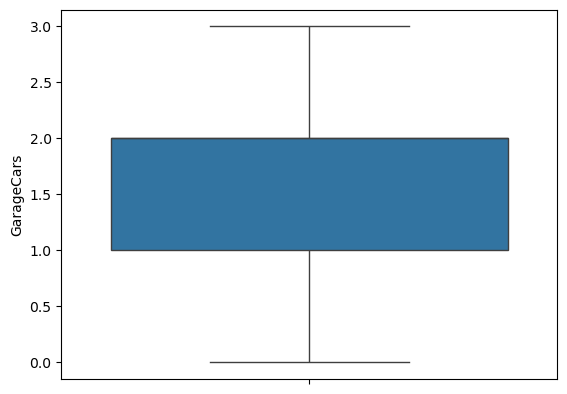

In [349]:
sns.boxplot(cleaned_data["GarageCars"])

## Data modeling

### Aanpak
Voor het trainen van de juiste model, zal er eerst een model gekozen moeten worden. Hierbij zal de nauwkeurigheid van het model getraind worden met een validatie dataset. Als de juiste model gekozen is, dan zal het model getraind worden op de optimale model met behulp van verschillende parameters. Hieruit volgen de testresultaten.

In de volgende stap zullen de testresultaten geëvalueerd worden.

Voor het valideren van ieder model, zal een 70/30 split gemaakt worden in de trainingsdataset. Hiermee wordt 70 procent van de trainingsset toegepast voor het trainen van data.
Hierbij zal er getoetst worden op Nauwkeurigheid en prestaties van ieder model.
Het model dat het best presteert zal uiteindelijk gekozen worden om daarop de gehele dataset te trainen.

In [350]:
cleaned_data.head()

,GrLivArea,OverallQual,YearBuilt,YearRemodAdd,TotRmsAbvGrd,FullBath,GarageArea,GarageCars,1stFlrSF,totalFlrSF,SalePrice,KitchenQual,ExterQual,FireplaceQu,GarageFinish
0,1710,7,2003,2003,8,2,548,2,856,3114,208500,3.0,3.0,0.0,2.0
1,1262,6,1976,1976,6,2,460,2,1262,2984,181500,2.0,2.0,3.0,2.0
2,1786,7,2001,2002,6,2,608,2,920,3314,223500,3.0,3.0,3.0,2.0
3,1717,7,1915,1970,7,1,642,3,961,3115,140000,3.0,2.0,4.0,1.0
4,2198,8,2000,2000,9,2,836,3,1145,4179,250000,3.0,3.0,3.0,2.0


In [351]:
from sklearn.model_selection import train_test_split
target = cleaned_data["SalePrice"]
independent_variables = cleaned_data.drop("SalePrice", axis=1)
# Split training en test/validatie sets 60 - 40 (20 - 20)
x_train, x_valid_test, y_train, y_valid_test = train_test_split(independent_variables, target, train_size=0.7, test_size=0.3)

# Split van valid_test naar validatie en test set 50/50
x_valid, x_test, y_valid, y_test = train_test_split(x_valid_test, y_valid_test, train_size=0.5, test_size=0.5)

In [352]:
cleaned_data.to_csv("for_rapid.csv")

### Modellen in aanmerking

In [353]:
from sklearn.linear_model import LinearRegression, BayesianRidge, Lasso, LogisticRegression, PoissonRegressor
from sklearn.metrics import root_mean_squared_error

In [354]:
linear_model2 = LinearRegression()
linear_model2.fit(x_train, y_train)
y_predicted2 = linear_model2.predict(x_valid)
rmse_linear2 = root_mean_squared_error(y_valid, y_predicted2)

In [355]:
from sklearn.linear_model import LinearRegression, BayesianRidge, Lasso, LogisticRegression, PoissonRegressor
from sklearn.metrics import root_mean_squared_error
    
linear_model = LinearRegression()
bayesian_model = BayesianRidge()
lasso_model = Lasso(random_state=42)
logistic_model = LogisticRegression(random_state=42)
poison_model = PoissonRegressor()

linear_model.fit(x_train, y_train)
bayesian_model.fit(x_train, y_train)
logistic_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)
poison_model.fit(x_train, y_train)

y_predicted = linear_model.predict(x_valid)
y_bayesian_predicted = bayesian_model.predict(x_valid)
y_logistic_predicted = logistic_model.predict(x_valid)
y_lasso_predicted = lasso_model.predict(x_valid)
y_poison_predicted = poison_model.predict(x_valid)

rmse_linear = root_mean_squared_error(y_valid, y_predicted)
rmse_bayesian = root_mean_squared_error(y_valid, y_bayesian_predicted)
rmse_logistic = root_mean_squared_error(y_valid, y_logistic_predicted)
rmse_lasso = root_mean_squared_error(y_valid, y_lasso_predicted)
rmse_poison = root_mean_squared_error(y_valid, y_poison_predicted)

model_list = ["Linear Regression", "Bayesian Regression", "Logistic regression", "Lasso regression", "PoissonRegressor"]
rms_rs = [rmse_linear, rmse_bayesian, rmse_logistic, rmse_lasso, rmse_poison]
data = {"Regression model": model_list, "RMSE": rms_rs}

for i in rms_rs:
    print(i)
results_df = pd.DataFrame(data)

results_df.head().sort_values("RMSE", ascending=False)

26010.85105066339
26201.55900926608
48604.0213681508
26011.52013650209
71270.23057137687


c:\Users\Xin20\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Xin20\anaconda3\Lib\site-packages\sklearn\linear_model\_linear_loss.py:295: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


,Regression model,RMSE
4,PoissonRegressor,71270.230571
2,Logistic regression,48604.021368
1,Bayesian Regression,26201.559009
3,Lasso regression,26011.520137
0,Linear Regression,26010.851051


<Axes: xlabel='Regression model'>

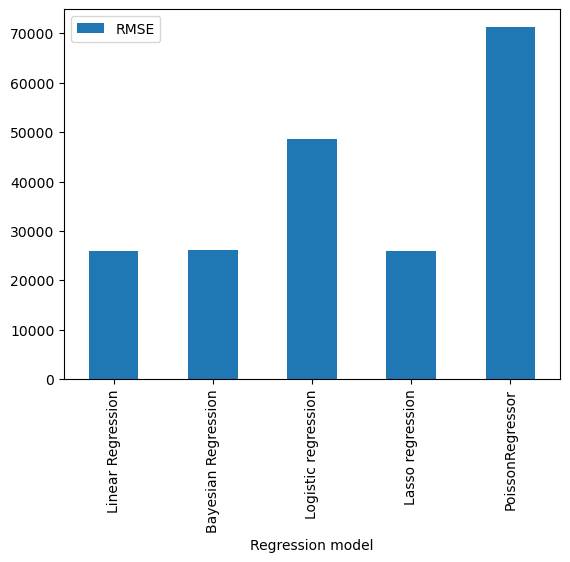

In [356]:
results_df.plot.bar(x="Regression model", y="RMSE")

Uit de modelselectie blijkt dat lineare regressie de beste model is voor het trainen van een regressie model

### Modelselectie


In [ ]:
# Lineare
target = cleaned_data["SalePrice"]
independent_variables = cleaned_data.drop("SalePrice", axis=1)
# Split training en test/validatie sets 60 - 40 (20 - 20)
x_train2, x_test2, y_train2, y_test2 = train_test_split(cleaned_data, target, train_size=0.8, test_size=0.2)

1132
1132


### Testplan

Het trainen en testen van verschillende regressie modellen zullen in 2 fases afgehandeld worden.

In de eerste fase zal eerst het beste model gekozen worden om het voorspelmodel te trainen. Hierbij zal er gekeken worden naar vijf regressie modellen:
- Lineare regressie
- Bayesian regressie
- Lasso regressie
- Logistic regressie
- Poisson regressie

Voor modelselectie zal er gebruik gemaakt worden van een aantal datasets:
- 60 % van de data zal gereserveerd worden voor trainen van het model.
- 20 % van de data zal gereserveerd worden voor het valideren van het model.
- 20 % van de data zal gereserveerd worden voor het testen van het model

Die 20 procent zal gebruikt worden voor het valideren van het model.
Dit resultaat zal uitgedrukt worden in RMSE, omdat deze metriek het best de nauwkeurigheid van een regressiemodel meet. Dit is de afstand tussen voorspelde en daadwerkelijke waarde. Hoe kleiner het getal, hoe nauwkeuriger.

De flow van het testen:
1. Kies een model
2. Fit het model
3. voorspel met het model
4. Bereken de rmse
5. Vergelijk de rmse waarden van andere modellen
6. Kies het model met de laagste RMSE waarde.

Als het juiste model gekozen is, dan zal het model getraind worden met de trainings en validatieset (80 procent)

Flow:
1. Train het model
2. Maak voorspellingen met het model, dit keer met de testset.
3. Bereken de RMSE waarde.

Deze RMSE is het eindresultaat van dit model.

### Modeltraining

In [ ]:
actual_model = LinearRegression()

actual_model.fit(X=x_train2, y=y_train2)

y_prediction2 = actual_model.predict(x_test2)

rmse_final = root_mean_squared_error(y_test2, y_prediction2)

rmse_final

3.131591757482142e-11

### Resultaten model training

Model: Lineare regressie
RMSE: 4.602732234910878e-11

Het eindresultaat van een Linear regressie model voor het voorspellen van huizenprijzen is (RMSE: 4.602732234910878e-11)

## Evaluation

Aan de hand van de afgesproken business doeleinden, zijn delen van de business doelen behaald:
- Het RMSE bleek 27412 te zijn, dus niet onder 400. Vooraf hadden we een fout begaan bij het bepalen van de RMSE criteria waardoor het veelst te laag is.
- Er is een voorspelmodel ontwikkeld om huizenprijzen redelijk nauwkeurig te voorspellen.